In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-energy-demand/cleanedEnergyData.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('/kaggle/input/delhi-energy-demand/cleanedEnergyData.csv', index_col=0)

In [5]:
df

,State,Energy Demand (in MW),datetime
0,Delhi - 2024,2019.57,2024-01-01 00:00:00
1,Delhi - 2024,1757.78,2024-01-01 01:00:00
2,Delhi - 2024,1605.63,2024-01-01 02:00:00
3,Delhi - 2024,1548.81,2024-01-01 03:00:00
4,Delhi - 2024,1596.26,2024-01-01 04:00:00
...,...,...,...
8755,Delhi - 2017,2986.64,2017-12-31 19:00:00
8756,Delhi - 2017,2780.17,2017-12-31 20:00:00
8757,Delhi - 2017,2539.07,2017-12-31 21:00:00
8758,Delhi - 2017,2316.31,2017-12-31 22:00:00


In [6]:
df = df.set_index('datetime')

In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64236 entries, 2024-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  64236 non-null  object 
 1   Energy Demand (in MW)  64236 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [9]:
df['Energy Demand (in MW)'].describe()

count    64236.000000
mean      3665.811159
std       1191.033166
min        527.280000
25%       2857.007500
50%       3567.940000
75%       4530.877500
max       7712.590000
Name: Energy Demand (in MW), dtype: float64

In [10]:
df.head()

,State,Energy Demand (in MW)
datetime,,
2024-01-01 00:00:00,Delhi - 2024,2019.57
2024-01-01 01:00:00,Delhi - 2024,1757.78
2024-01-01 02:00:00,Delhi - 2024,1605.63
2024-01-01 03:00:00,Delhi - 2024,1548.81
2024-01-01 04:00:00,Delhi - 2024,1596.26


In [11]:
df = df.drop(columns = ['State'])

In [12]:
df.head()

,Energy Demand (in MW)
datetime,
2024-01-01 00:00:00,2019.57
2024-01-01 01:00:00,1757.78
2024-01-01 02:00:00,1605.63
2024-01-01 03:00:00,1548.81
2024-01-01 04:00:00,1596.26


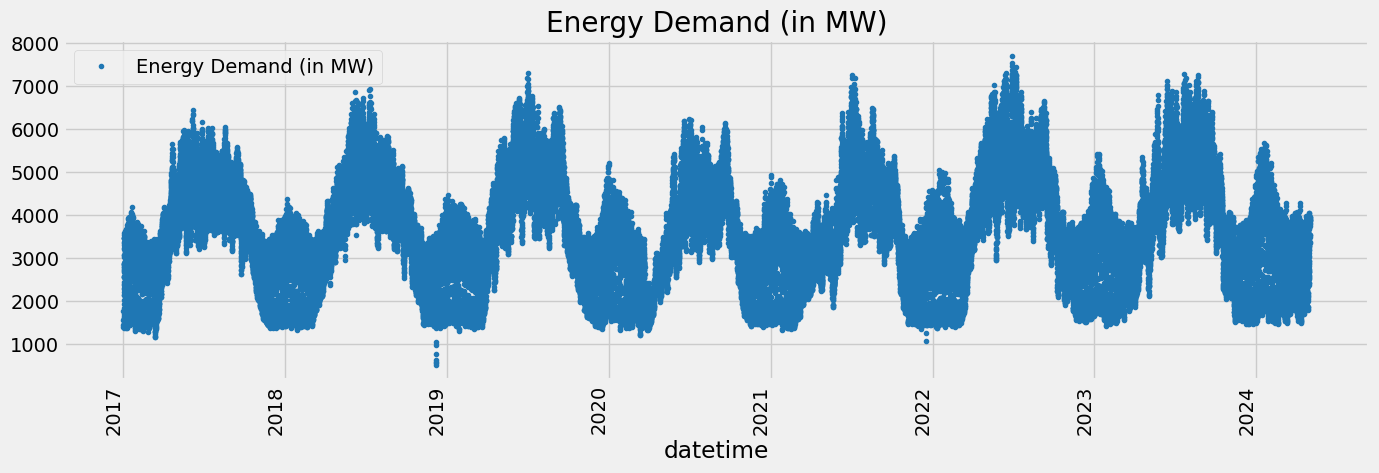

In [13]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Energy Demand (in MW)')
plt.xticks(rotation=90)
plt.show()

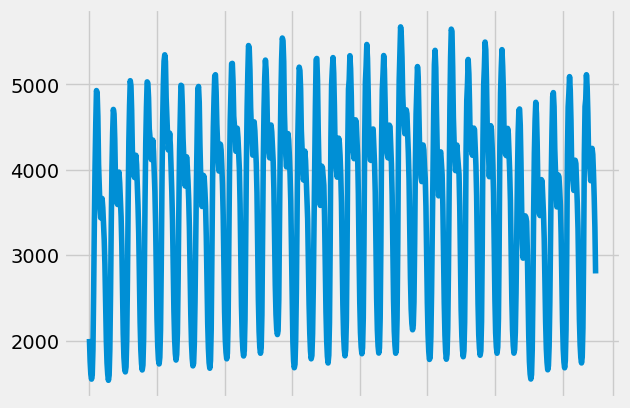

In [14]:
temp = df[:720]
plt.plot(temp.index, temp['Energy Demand (in MW)'])
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,    
    top=False,         
    labelbottom=False) 

In [15]:
temp_df1 = df[:24]
temp_df2 = df[24:48]

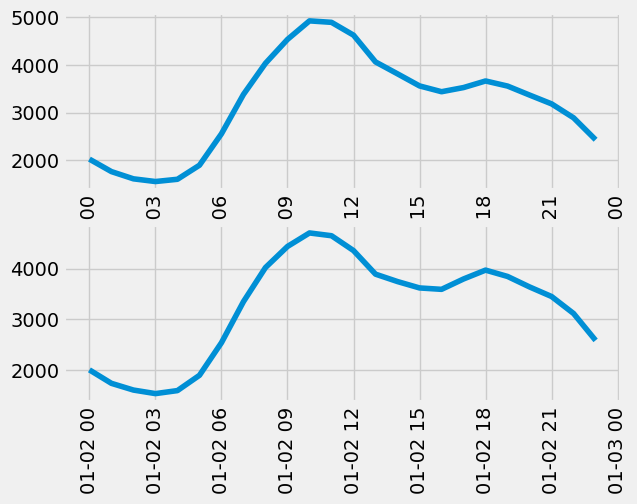

In [16]:
plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
plt.plot(temp_df1.index, temp_df1['Energy Demand (in MW)'])

plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
plt.plot(temp_df2.index, temp_df2['Energy Demand (in MW)'])

In [17]:
x = range(len(temp_df1))

In [18]:
temp_df1.shape

(24, 1)

In [19]:
temp_df2.shape

(24, 1)

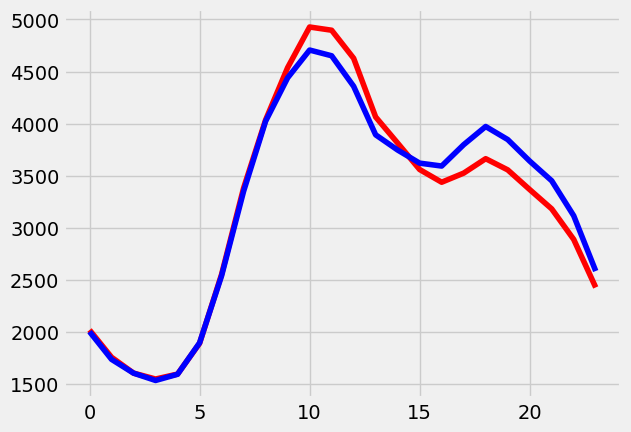

In [20]:
plt.plot(x, temp_df1['Energy Demand (in MW)'], c = 'Red')
plt.plot(x, temp_df2['Energy Demand (in MW)'], c = 'Blue')

In [21]:
temp = df.loc[(df.index > '2018-01-01') & (df.index < '2018-03-01')]

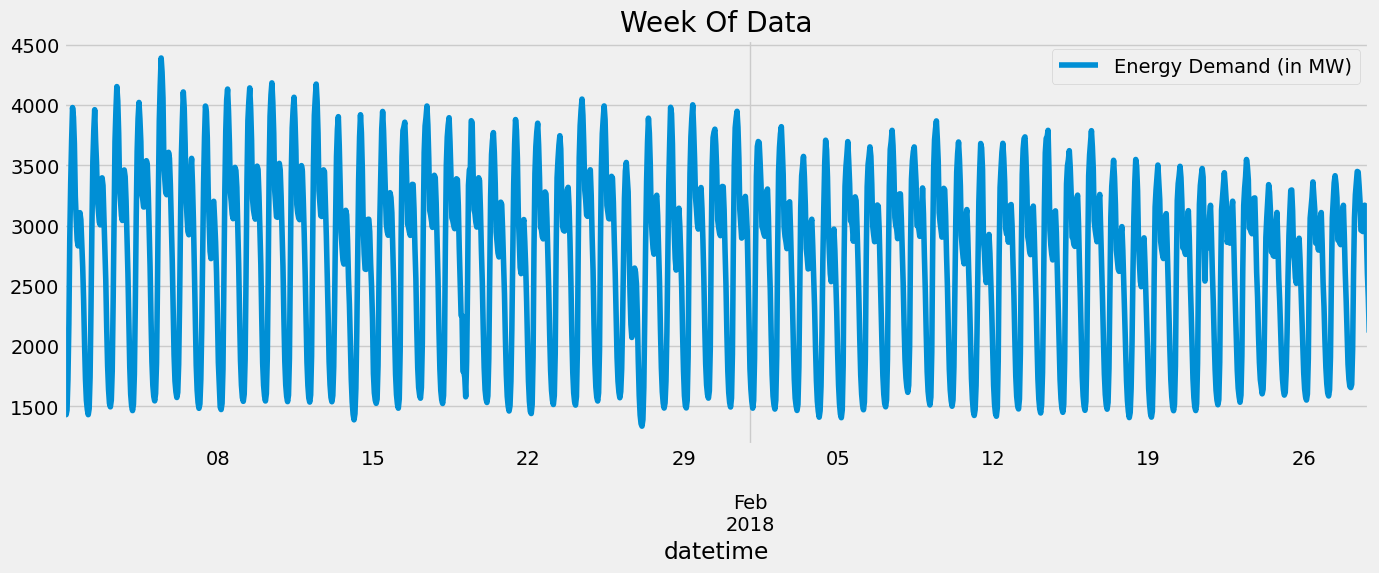

In [22]:
temp.plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# **Outlier Analysis**

<Axes: ylabel='Frequency'>

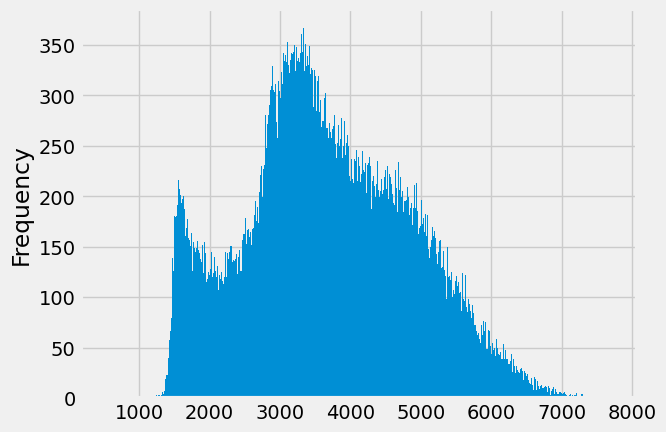

In [23]:
df['Energy Demand (in MW)'].plot(kind='hist', bins=500)

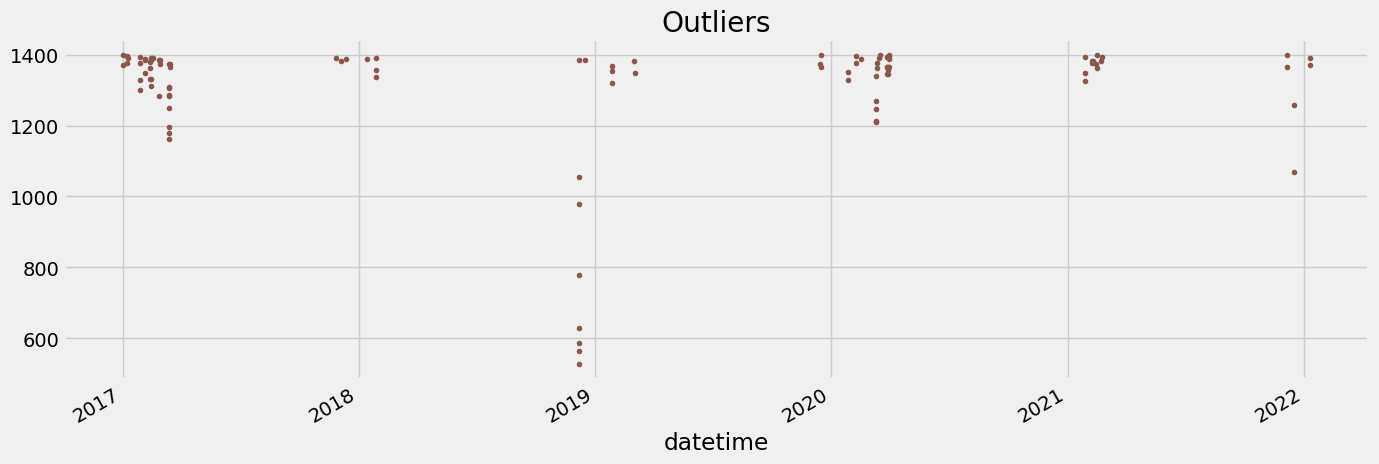

In [24]:
df.query('`Energy Demand (in MW)` < 1400')['Energy Demand (in MW)'].plot(
    style='.',
    figsize=(15, 5),
    color=color_pal[5],
    title='Outliers'
)
plt.show()


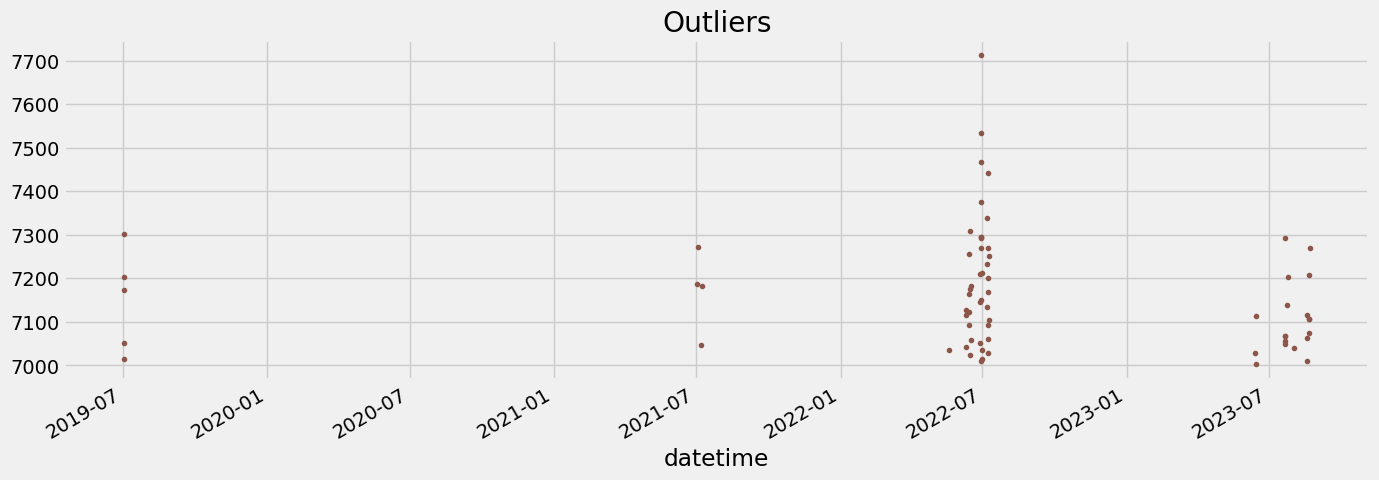

In [25]:
df.query('`Energy Demand (in MW)` > 7000')['Energy Demand (in MW)'].plot(
    style='.',
    figsize=(15, 5),
    color=color_pal[5],
    title='Outliers'
)
plt.show()


In [26]:
df1 = df[(df['Energy Demand (in MW)'] > 1500) & (df['Energy Demand (in MW)'] < 7000)]

<Axes: ylabel='Frequency'>

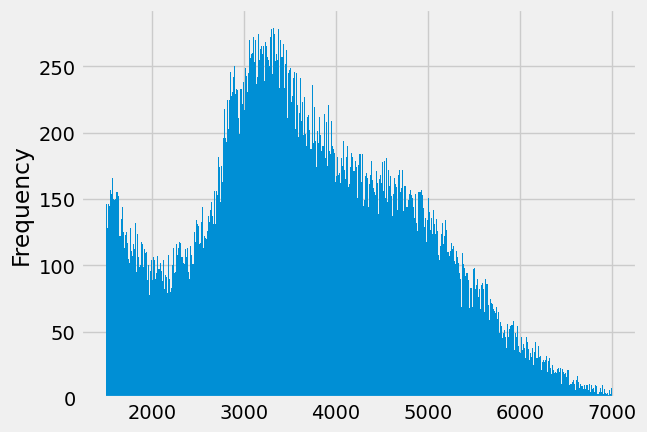

In [27]:
df1['Energy Demand (in MW)'].plot(kind='hist', bins=500)

# **Feature Creation**

In [28]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [29]:
df.head()

,Energy Demand (in MW),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2024-01-01 00:00:00,2019.57,0,0,1,1,2024,1,1,1
2024-01-01 01:00:00,1757.78,1,0,1,1,2024,1,1,1
2024-01-01 02:00:00,1605.63,2,0,1,1,2024,1,1,1
2024-01-01 03:00:00,1548.81,3,0,1,1,2024,1,1,1
2024-01-01 04:00:00,1596.26,4,0,1,1,2024,1,1,1


In [30]:
df.tail()

,Energy Demand (in MW),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2017-12-31 19:00:00,2986.64,19,6,4,12,2017,365,31,52
2017-12-31 20:00:00,2780.17,20,6,4,12,2017,365,31,52
2017-12-31 21:00:00,2539.07,21,6,4,12,2017,365,31,52
2017-12-31 22:00:00,2316.31,22,6,4,12,2017,365,31,52
2017-12-31 23:00:00,2048.47,23,6,4,12,2017,365,31,52


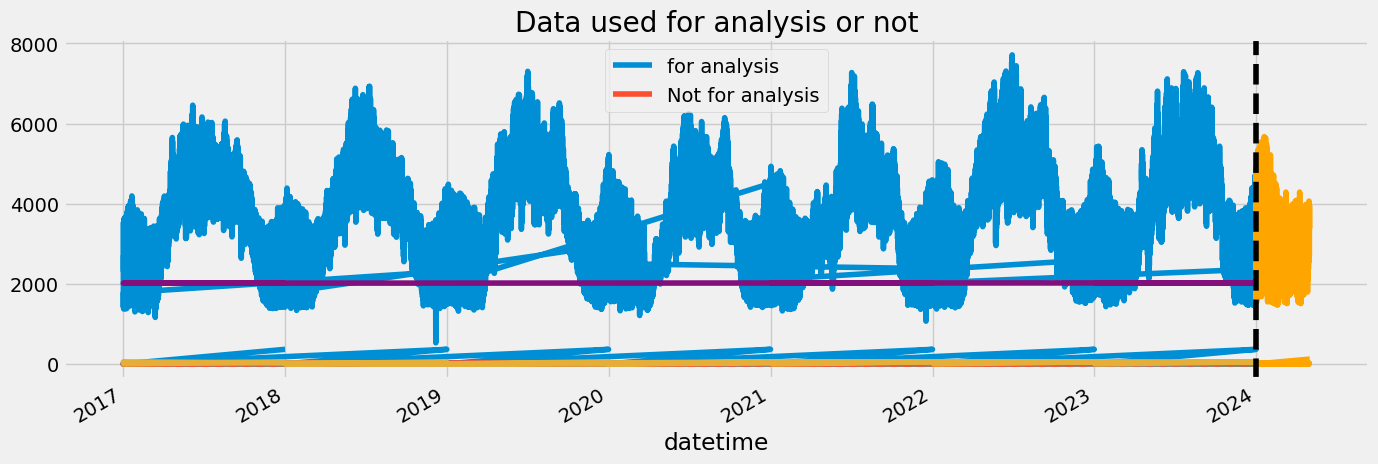

In [31]:
dfuse = df.loc[df.index < '2024-01-01']
df24 = df.loc[df.index >= '2024-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
dfuse.plot(ax=ax, label = 'for analysis', title = 'Data used for analysis or not')
df24.plot(ax=ax, label = 'Not for analysis', c='orange')
ax.axvline('2024-01-01', color='black', ls='--')
ax.legend(['for analysis', 'Not for analysis'])
plt.show()

# **Data Visualization**

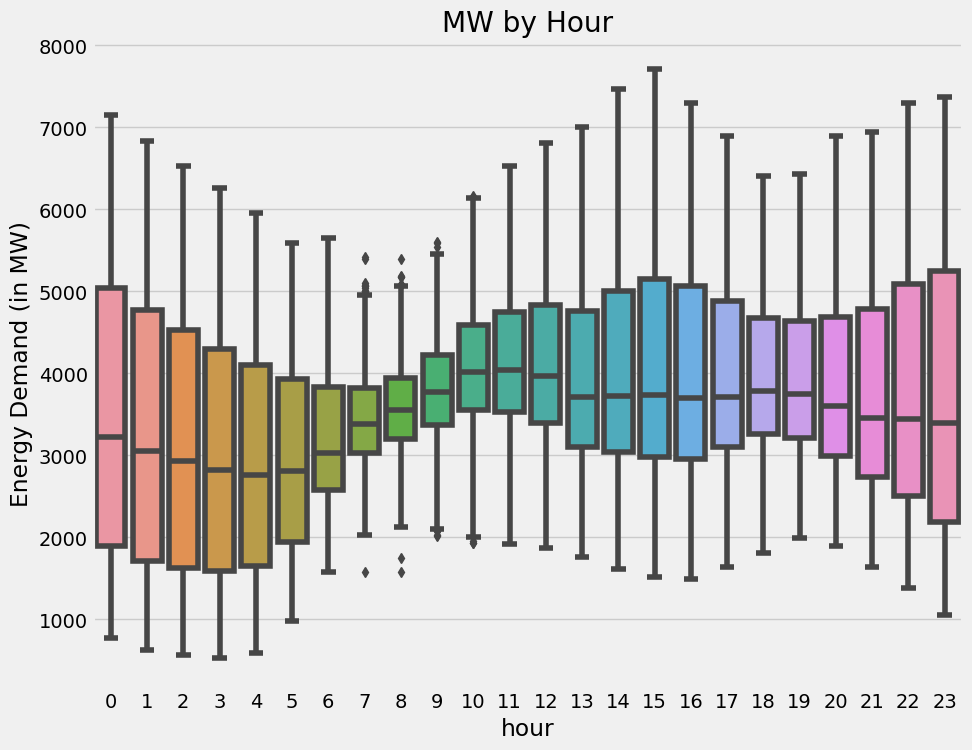

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfuse, x='hour', y='Energy Demand (in MW)')
ax.set_title('MW by Hour')
plt.show()

**Insights:**
1. **The spread of the energy demand is higher for night time**
2. **The peak of energy demand is at 3:00 p.m.**
3. **The median energy demand is highest at 12:00 p.m.**

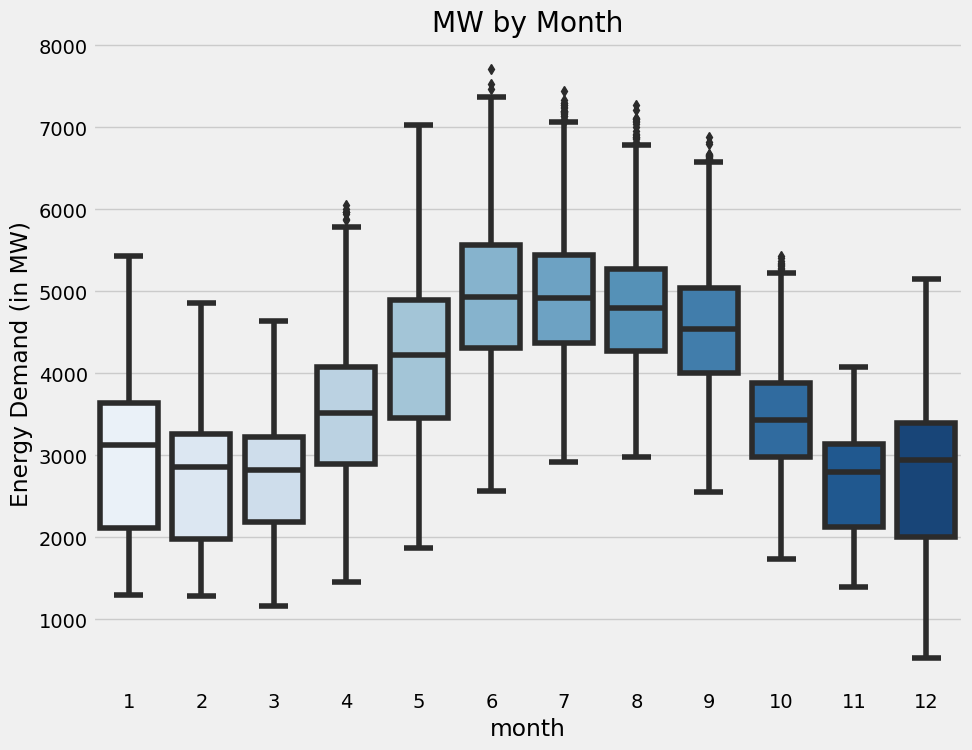

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfuse, x='month', y='Energy Demand (in MW)', palette='Blues')
ax.set_title('MW by Month')
plt.show()

**Insights:**
1. **The energy demand is higher in months of June, July and August, or in summer season**
2. **Similarly, the enedy demand is lower in winter season**
3. **The demand can be as low as 500 MW in December and as high as 7500 MW in June**

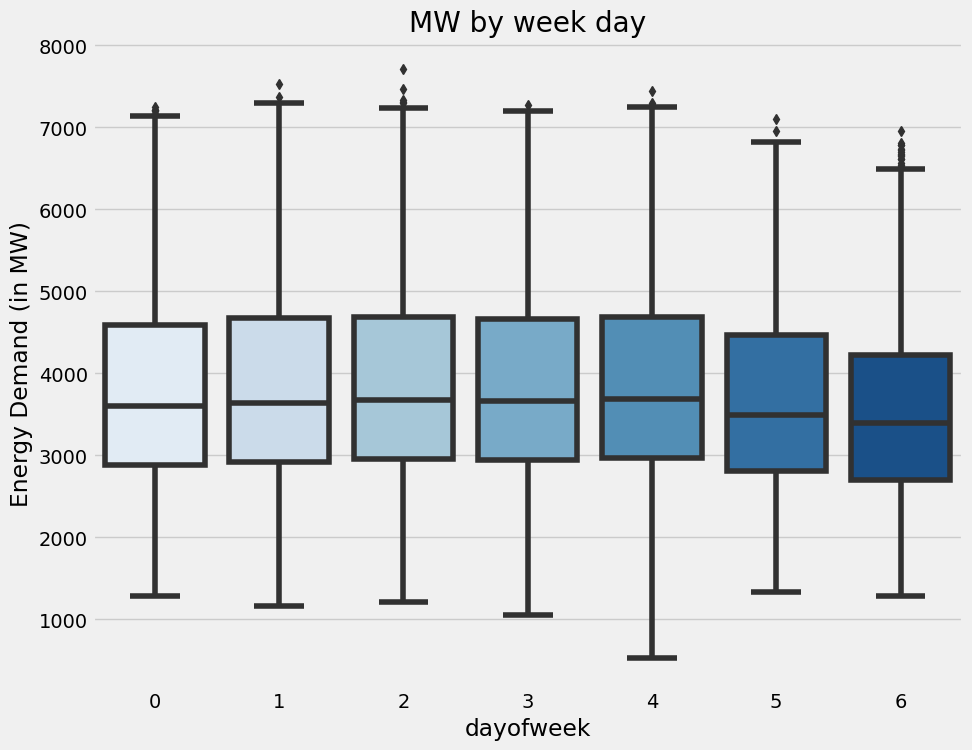

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfuse, x='dayofweek', y='Energy Demand (in MW)', palette='Blues')
ax.set_title('MW by week day')
plt.show()

**Insight:**
1. **There is not much relation between dayofweek and energy demand**
2. **Although, the energy demand at weekends is less than other days**

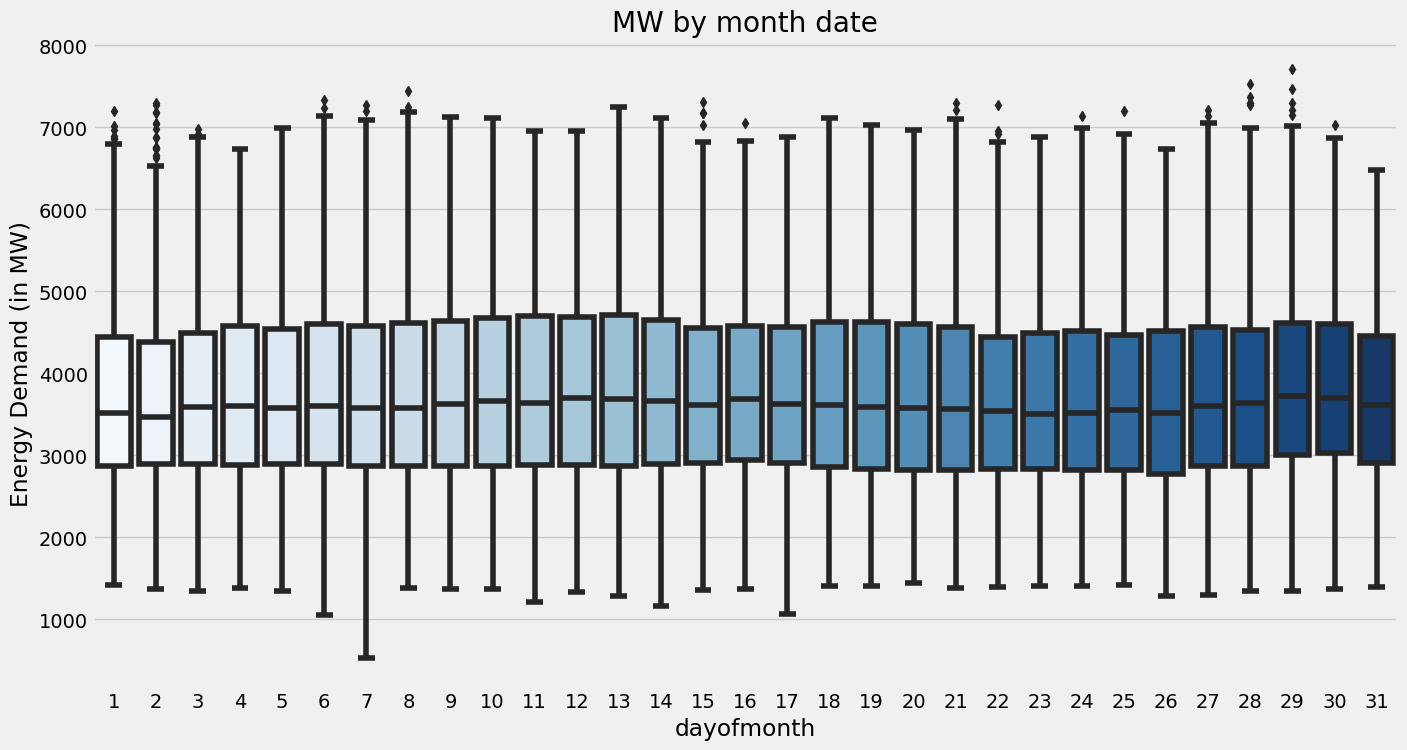

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=dfuse, x='dayofmonth', y='Energy Demand (in MW)', palette='Blues')
ax.set_title('MW by month date')
plt.show()

Insight: Not much information

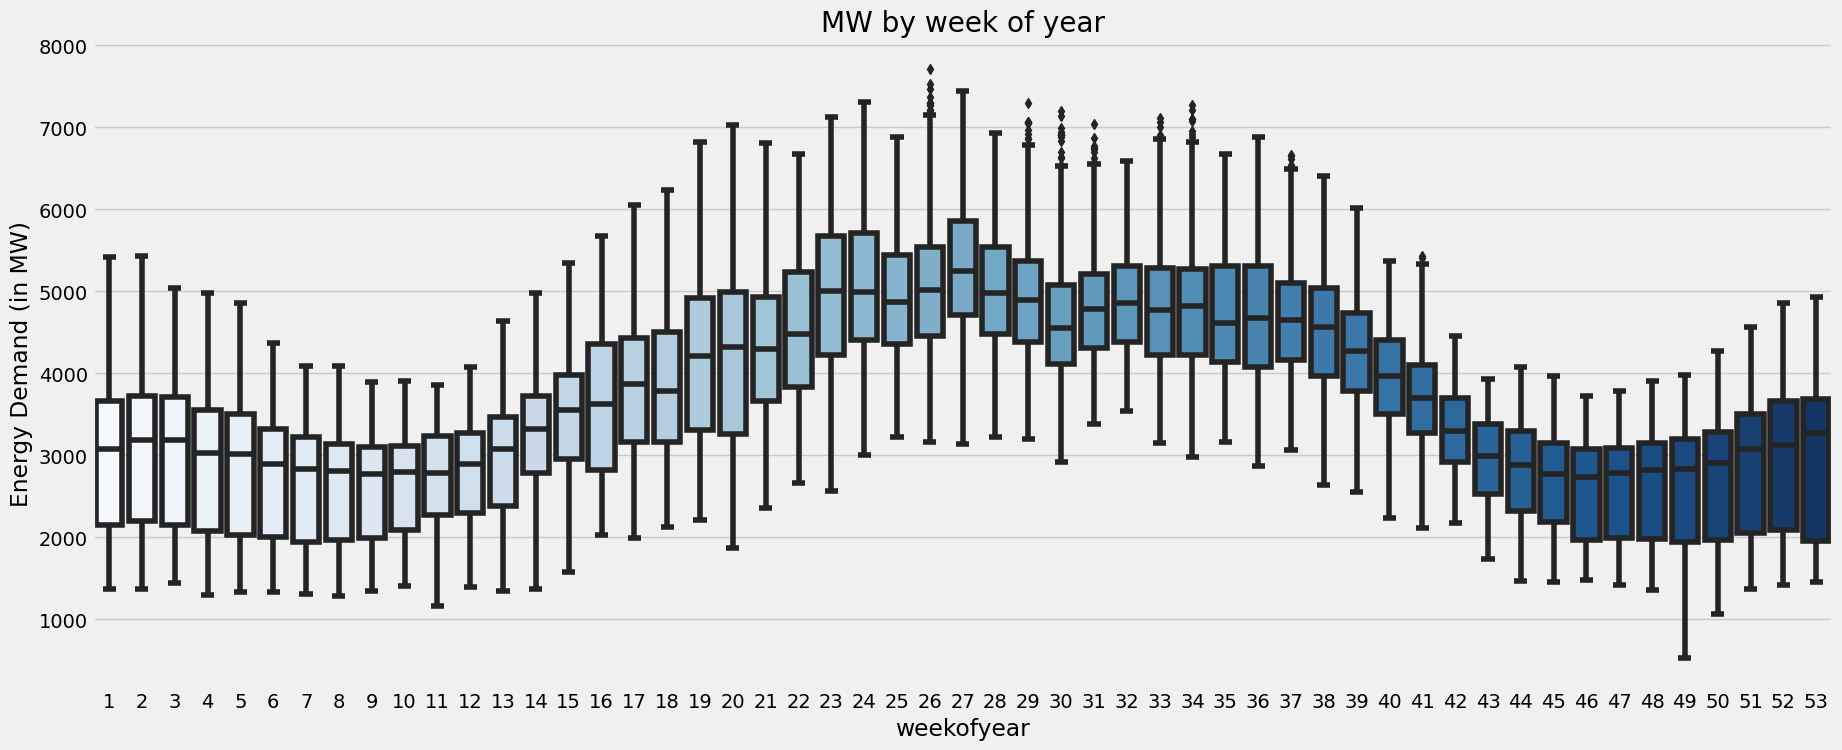

In [36]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=dfuse, x='weekofyear', y='Energy Demand (in MW)', palette='Blues')
ax.set_title('MW by week of year')
plt.show()

Insight: Similar to month plot

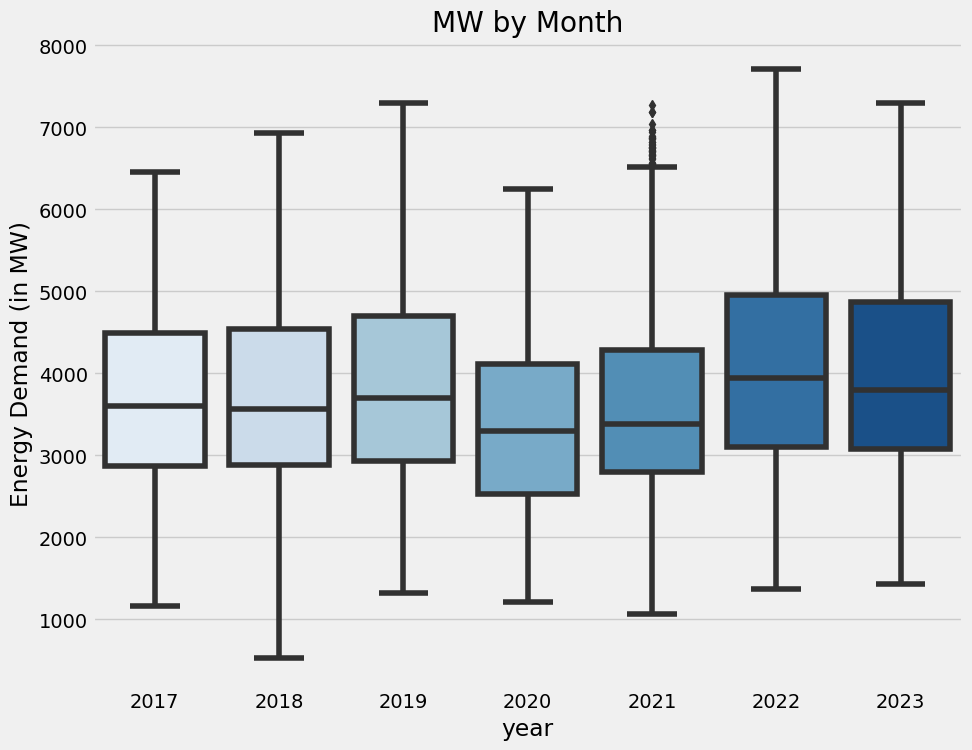

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfuse, x='year', y='Energy Demand (in MW)', palette='Blues')
ax.set_title('MW by Month')
plt.show()

**Insight:**
1. **The dip in the energy demand for the year 2020 and 2021 might be caused due to the COVID-19 pandemic and lockdown**

# More Anaysis

In [49]:
from statsmodels.tsa.stattools import adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

In [75]:
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Energy Demand (in MW)")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

In [43]:
check_adfuller(dfuse['Energy Demand (in MW)'])

Test statistic:  -5.797075393737467
p-value:  4.724637128173948e-07
Critical Values: {'1%': -3.4304567319610313, '5%': -2.8615871735260323, '10%': -2.566795108874435}


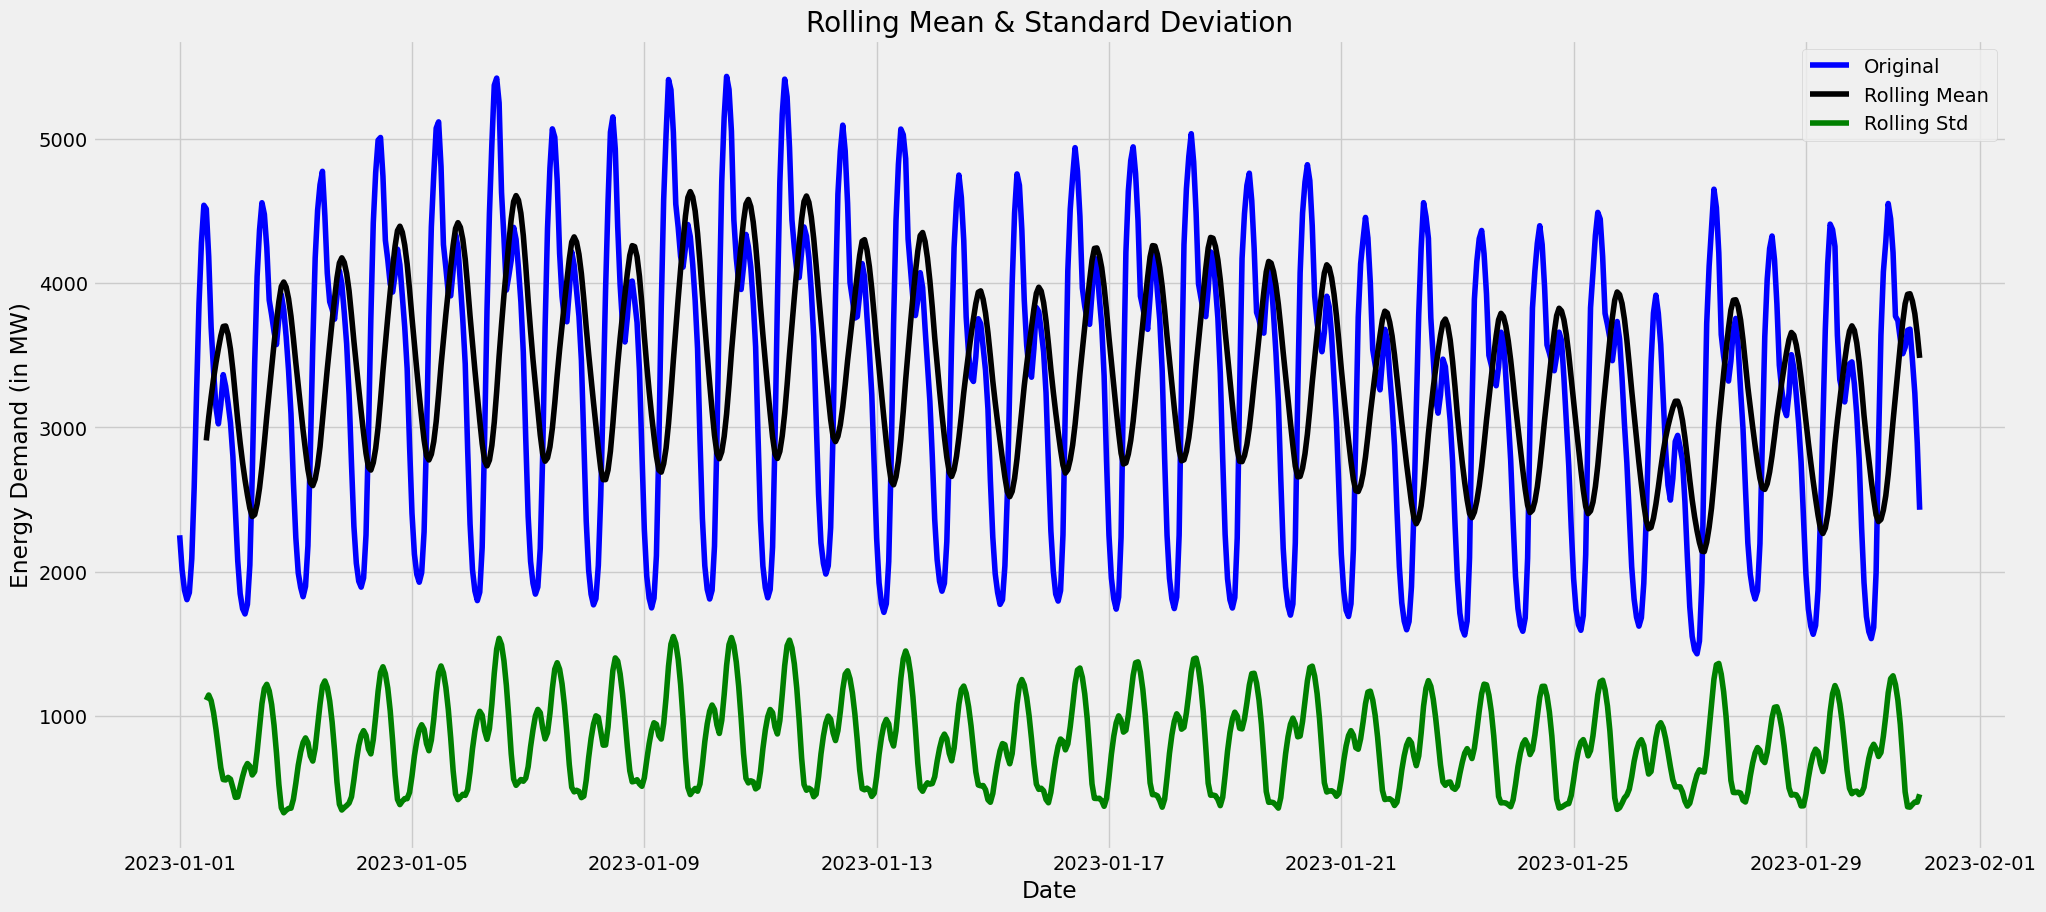

In [76]:
check_mean_std(dfuse['Energy Demand (in MW)'][:720])

In [78]:
def plot_rolling(ts, rolling_window = 12):
    rolmean = ts.rolling(rolling_window).mean()
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand (in MW)')
    plt.xticks(rotation=45)

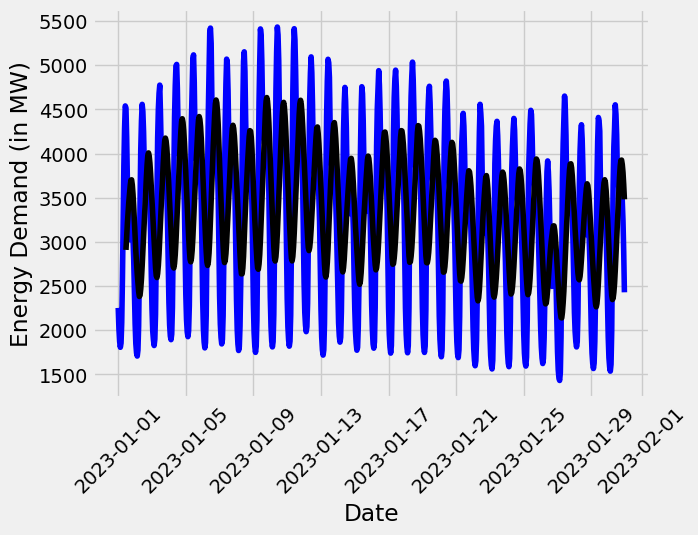

In [79]:
plot_rolling(dfuse['Energy Demand (in MW)'][:720], 12)

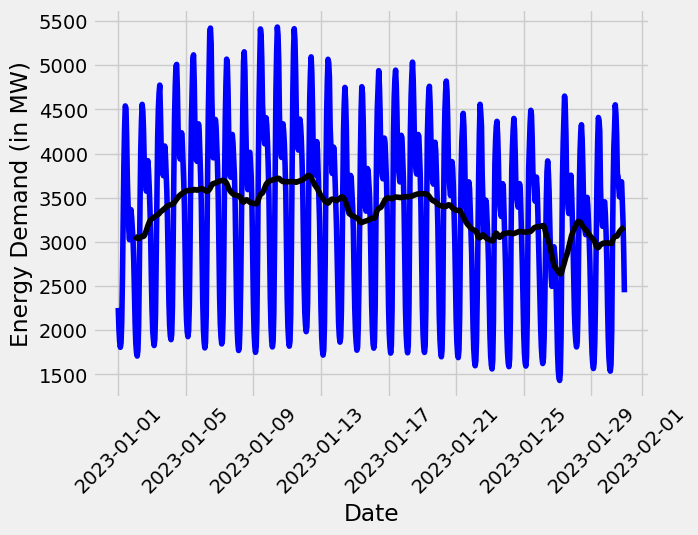

In [80]:
plot_rolling(dfuse['Energy Demand (in MW)'][:720], 24)

In [110]:
ts = dfuse['Energy Demand (in MW)']
rolmean = ts.rolling(24).mean()
roll_diff = ts - rolmean

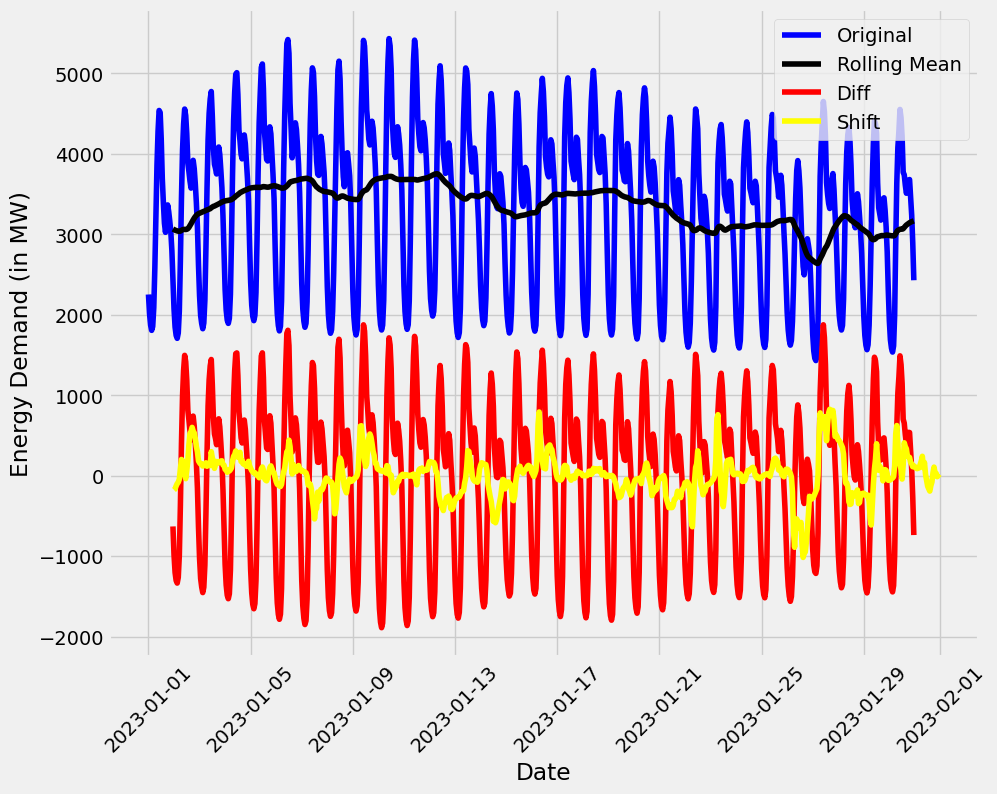

In [114]:
fig, ax = plt.subplots(figsize=(10, 8))
orig = plt.plot(ts[:720], color='blue',label='Original')
mean = plt.plot(rolmean[:720], color='black', label='Rolling Mean')
diff = plt.plot(roll_diff[:720], color='red', label='Diff')
plt.plot(shift_cleaned[:720], color='yellow', label='Shift')  
plt.xlabel('Date')
plt.ylabel('Energy Demand (in MW)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

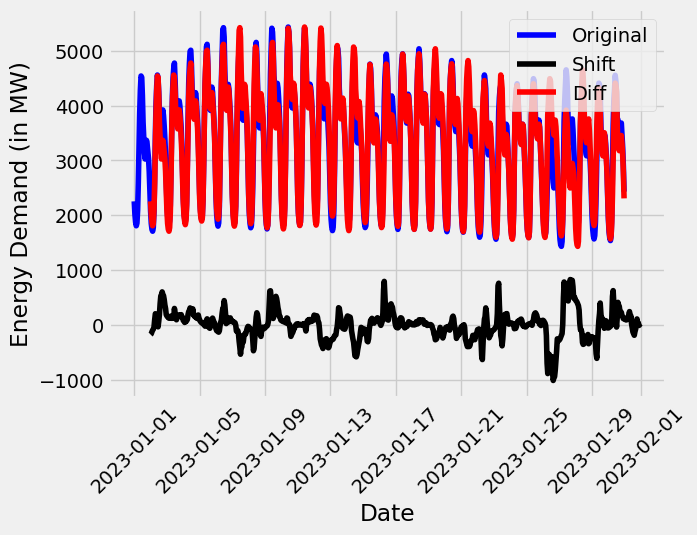

In [112]:
shift = ts - ts.shift(24)  
shift_cleaned = shift.dropna()

plt.plot(ts[:720], color='blue', label='Original')
plt.plot(shift_cleaned[:720], color='black', label='Shift')  

diff = ts[:720] - shift_cleaned[:720]
plt.plot(diff[:720], color='red', label='Diff')

# Label and style the plot
plt.xlabel('Date')
plt.ylabel('Energy Demand (in MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

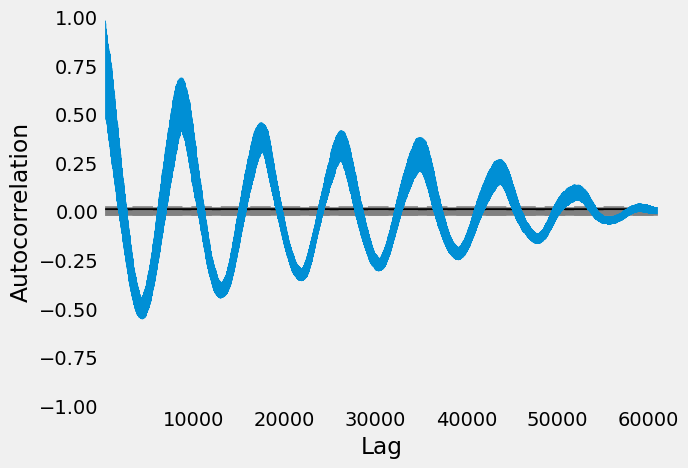

In [119]:
pd.plotting.autocorrelation_plot(dfuse['Energy Demand (in MW)']) 

In [39]:
import statsmodels.api as st

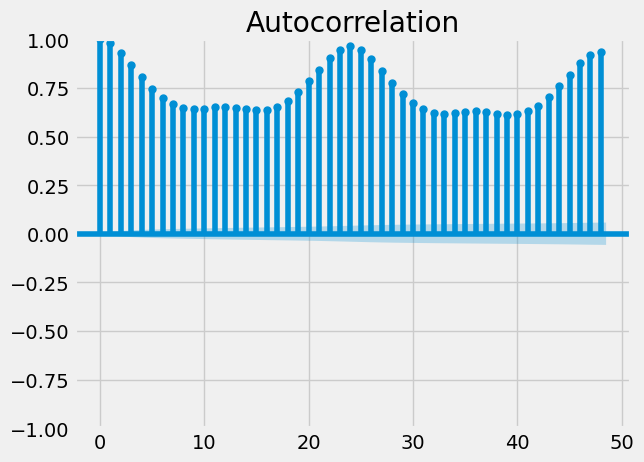

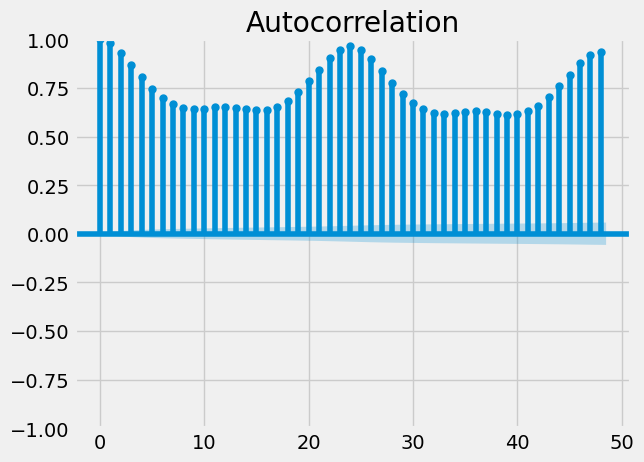

In [118]:
st.graphics.tsa.plot_acf(dfuse['Energy Demand (in MW)'])